# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop(['Unnamed: 0'],axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [5]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Captain Cold,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [6]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [7]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

As Publisher is a categorical value and has a low percentage of missing data, we will keep the data and create a new category. In order to make sure we are using a unique categorie for our missing publishers, we want to use .unique() to check what existing Published values are in the dataframe. From this we can conclude that 'Unknown' is a good option for a new category.

For Weight, we see there are only two null values so we will replace the null values with the Median weight of the dataset as it will have a low impact across the data.

We have to sort the output of powers_df.isna() to ensure that there are no null values since the series gets truncated. There are no null values in powers_df


In [8]:
heroes_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [9]:
heroes_df.Publisher.unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [10]:
heroes_df.Publisher.fillna('Unknown', inplace=True)

In [11]:
heroes_df.isnull().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        2
dtype: int64

In [12]:
x= heroes_df.Weight.median()
heroes_df.Weight.fillna(x, inplace=True)

In [13]:
heroes_df.isnull().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [14]:
series_test=powers_df.isnull().sum()
series_test.sort_values(ascending=False)

Omniscient                      0
Element Control                 0
Reflexes                        0
Enhanced Memory                 0
Summoning                       0
Projection                      0
Fire Control                    0
Electrical Transport            0
Astral Projection               0
Phasing                         0
Camouflage                      0
Omnipresent                     0
Immortality                     0
Peak Human Condition            0
Shapeshifting                   0
Power Sense                     0
Dimensional Travel              0
Clairvoyance                    0
Jump                            0
Hyperkinesis                    0
Invulnerability                 0
Energy Constructs               0
Force Fields                    0
Self-Sustenance                 0
Enhanced Hearing                0
Power Absorption                0
Fire Resistance                 0
Mind Control                    0
Precognition                    0
Animation     

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [15]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [17]:
heroes_df.set_index("name", inplace=True)
powers_df.set_index("hero_names", inplace=True)

In [18]:
super_heroes_df = heroes_df.join(powers_df, how='inner')

In [19]:
super_heroes_df.reset_index(inplace = True)
super_heroes_df.rename(index=str, columns={"index": "name"}, inplace=True)
super_heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [20]:
super_heroes_df.isnull().sum()
super_heroes_df.sort_values(by=ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [21]:
super_heroes_df.columns = super_heroes_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
super_heroes_df.head()

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight,...,web_creation,reality_warping,odin_force,symbiote_costume,speed_force,phoenix_force,molecular_dissipation,vision_-_cryo,omnipresent,omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

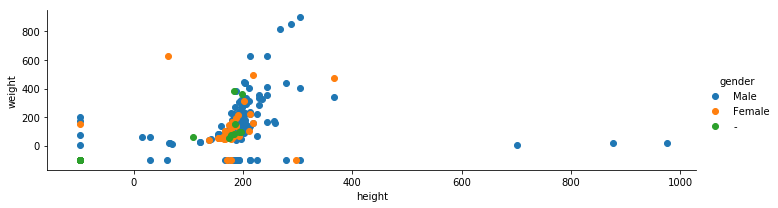

In [22]:
male_heroes_df = super_heroes_df.loc[super_heroes_df['gender'] == 'Male']
female_heroes_df = super_heroes_df.loc[super_heroes_df['gender'] == 'Female']

figure = sns.FacetGrid(data=super_heroes_df, hue='gender', aspect=3.3, legend_out=True)
figure.map(plt.scatter, 'height', 'weight').add_legend()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [23]:
male_heroes_df = super_heroes_df.loc[super_heroes_df['gender'] == 'Male']
female_heroes_df = super_heroes_df.loc[super_heroes_df['gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    dataframe_by_gender = dataframe.loc[dataframe['gender'] == gender]
    figure = sns.distplot(dataframe_by_gender[column_name])
    return figure

C:\Users\Emily McMillen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


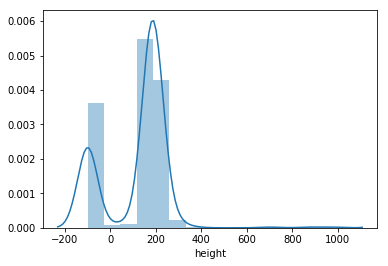

In [24]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'height')

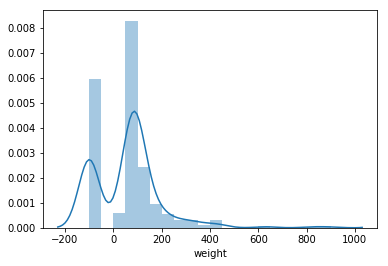

In [25]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'weight')

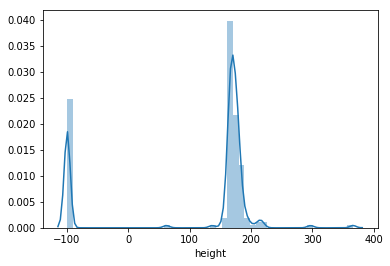

In [26]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'height')

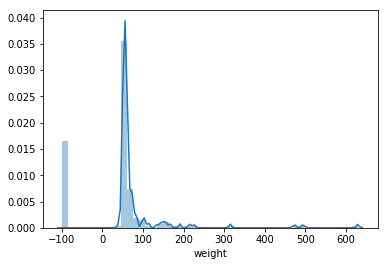

In [27]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

The female superheros tend to be taller and weigh less, while the male superhereos then to shorter and weight more.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [28]:
#What are the 5 most common powers overall?

powers_series = super_heroes_df.loc[:,'agility':].sum()
powers_series.sort_values(ascending=False).head()

super_strength    362
stamina           294
durability        262
super_speed       251
agility           244
dtype: int64

In [29]:
#What are the 5 most common powers in the Marvel Universe?

marvel_powers_df = super_heroes_df.loc[super_heroes_df['publisher'] == 'Marvel Comics']

marvel_powers_series =marvel_powers_df.loc[:,'agility':].sum()
marvel_powers_series.sort_values(ascending=False).head()

super_strength    204
durability        154
stamina           150
super_speed       137
agility           126
dtype: int64

In [30]:
#What are the 5 most common powers in the DC Universe?

dc_powers_df = super_heroes_df.loc[super_heroes_df['publisher'] == 'DC Comics']

dc_powers_series =dc_powers_df.loc[:,'agility':].sum()
dc_powers_series.sort_values(ascending=False).head()

super_strength    109
stamina            90
flight             86
super_speed        79
agility            71
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

Super strength is the top power across the larger dataset and within the Marvel and DC subset. The top 5 powers in the larger dataset and subsets are almost the same, however DC heros have flight as a top 5 power where Marvel and the larger datset have durability as a power.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

#### Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?

##### I will create a co-occurance table (Combinations) of all of the possible superpower pairs for Male heroes and Female heroes. I will then compare these dateframes to determine what the top cooccuring superpowers are for Male and Female heroes.



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [31]:
super_heroes_df.head()

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight,...,web_creation,reality_warping,odin_force,symbiote_costume,speed_force,phoenix_force,molecular_dissipation,vision_-_cryo,omnipresent,omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [32]:
#create df of possible power combinations cc_df

cc = list(combinations(super_heroes_df.iloc[:,10:177].columns,2))
cc_df = pd.DataFrame(columns=['Combinations'])
cc_data = np.array(cc)

i=0

while i<(len(cc_data)):
#    print(len(cc_data))
    string = cc_data[i][0]
    string2 = cc_data[i][1]
    string3 = (string + ' and '+ string2)

    
    cc_df.loc[i]=[string3]
    i+=1

cc_df.tail()

,Combinations
13856,molecular_dissipation and omnipresent
13857,molecular_dissipation and omniscient
13858,vision_-_cryo and omnipresent
13859,vision_-_cryo and omniscient
13860,omnipresent and omniscient


In [33]:
col_start = 10
Occurances = []
Likelihood = []

while col_start <(len(super_heroes_df.columns)):
    col_it = col_start+1
    while col_it <len(super_heroes_df.columns):
        x = ((super_heroes_df.iloc[:,col_start])&(super_heroes_df.iloc[:,col_it])).sum()
        Occurances.append(x)
        x = x/660
        Likelihood.append(x)
        col_it +=1
    col_start +=1

#append columns onto cc_df

cc_df['Occurances'] = Occurances
cc_df['Likelihood'] = Likelihood

#Sort cc_df by number of occurances 

cc_df.sort_values(by=['Occurances'], ascending=False).head()

,Combinations,Occurances,Likelihood
831,durability and super_strength,232,0.351515
2698,super_strength and super_speed,224,0.339394
2693,super_strength and stamina,224,0.339394
24,agility and stamina,181,0.274242
3854,stamina and super_speed,177,0.268182


### What does our hero gender distribution look like?

In [34]:
super_heroes_df.groupby('gender')['name'].count()

gender
-          18
Female    178
Male      464
Name: name, dtype: int64

### Let's take a look at our Male hereos and create a table just for them!

In [35]:
male_heroes_df = super_heroes_df.loc[super_heroes_df['gender'] == 'Male']
male_heroes_df.head()

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight,...,web_creation,reality_warping,odin_force,symbiote_costume,speed_force,phoenix_force,molecular_dissipation,vision_-_cryo,omnipresent,omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
cc_male = list(combinations(male_heroes_df.iloc[:,10:177].columns,2))
cc_male_df = pd.DataFrame(columns=['Combinations'])
cc_male_data = np.array(cc_male)

i=0

while i<(len(cc_male_data)):
#    print(len(cc_data))
    string = cc_male_data[i][0]
    string2 = cc_male_data[i][1]
    string3 = (string + ' and '+ string2)

    
    cc_male_df.loc[i]=[string3]
    i+=1
    
cc_male_df.tail()

,Combinations
13856,molecular_dissipation and omnipresent
13857,molecular_dissipation and omniscient
13858,vision_-_cryo and omnipresent
13859,vision_-_cryo and omniscient
13860,omnipresent and omniscient


In [37]:
cc_normalized_male_df=cc_male_df.copy(deep=True)

In [38]:
col_start = 10
Occurances = []
Likelihood = []

while col_start <(len(male_heroes_df.columns)):
    col_it = col_start+1
    while col_it <len(male_heroes_df.columns):
        x = ((male_heroes_df.iloc[:,col_start])&(male_heroes_df.iloc[:,col_it])).sum()
        Occurances.append(x)
        x = x/464
        Likelihood.append(x)
        col_it +=1
    col_start +=1
    
#append columns onto cc_male_df
cc_male_df['Occurances'] = Occurances
cc_male_df['Likelihood'] = Likelihood

#Sort cc_male_df by number of occurances 
cc_male_df.sort_values(by=['Occurances'], ascending=False).head()

,Combinations,Occurances,Likelihood
831,durability and super_strength,173,0.372845
2693,super_strength and stamina,169,0.364224
2698,super_strength and super_speed,163,0.351293
3854,stamina and super_speed,137,0.295259
24,agility and stamina,133,0.286638


In [50]:
cc_male_df.set_index('Combinations', inplace=True)
cc_male_df.head()

,Occurances,Likelihood
Combinations,,
agility and accelerated_healing,79,0.170259
agility and lantern_power_ring,4,0.008621
agility and dimensional_awareness,8,0.017241
agility and cold_resistance,23,0.049569
agility and durability,90,0.193966


### Now for our Female heroes!

In [40]:
female_heroes_df = super_heroes_df.loc[super_heroes_df['gender'] == 'Female']
female_heroes_df.head()

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight,...,web_creation,reality_warping,odin_force,symbiote_costume,speed_force,phoenix_force,molecular_dissipation,vision_-_cryo,omnipresent,omniscient
22,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,False
23,Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0,...,False,False,False,False,False,False,False,False,False,False
24,Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
36,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0,...,True,False,False,False,False,False,False,False,False,False
38,Arclight,Female,violet,-,Purple,173.0,Marvel Comics,-,bad,57.0,...,False,False,False,False,False,False,False,False,False,False


In [51]:
cc_female = list(combinations(male_heroes_df.iloc[:,10:177].columns,2))
cc_female_df = pd.DataFrame(columns=['Combinations'])
cc_female_data = np.array(cc_female)

i=0

while i<(len(cc_female_data)):
#    print(len(cc_data))
    string = cc_female_data[i][0]
    string2 = cc_female_data[i][1]
    string3 = (string + ' and '+ string2)

    
    cc_female_df.loc[i]=[string3]
    i+=1

cc_female_df.tail()

,Combinations
13856,molecular_dissipation and omnipresent
13857,molecular_dissipation and omniscient
13858,vision_-_cryo and omnipresent
13859,vision_-_cryo and omniscient
13860,omnipresent and omniscient


In [52]:
col_start = 10
Occurances = []
Likelihood = []

while col_start <(len(female_heroes_df.columns)):
    col_it = col_start+1
    while col_it <len(female_heroes_df.columns):
        x = ((female_heroes_df.iloc[:,col_start])&(female_heroes_df.iloc[:,col_it])).sum()
        Occurances.append(x)
        x = x/464
        Likelihood.append(x)
        col_it +=1
    col_start +=1

#append columns onto cc_female_df

cc_female_df['Occurances'] = Occurances
cc_female_df['Likelihood'] = Likelihood

#Sort cc_female_df by number of occurances 
cc_female_df.sort_values(by=['Occurances'], ascending=False).head()

,Combinations,Occurances,Likelihood
2698,super_strength and super_speed,55,0.118534
831,durability and super_strength,53,0.114224
2693,super_strength and stamina,52,0.112069
16,agility and super_strength,46,0.099138
24,agility and stamina,46,0.099138


In [53]:
#set the index to "combinations so we can join our tables

cc_female_df.set_index('Combinations', inplace=True)
cc_female_df.head()

,Occurances,Likelihood
Combinations,,
agility and accelerated_healing,23,0.049569
agility and lantern_power_ring,1,0.002155
agility and dimensional_awareness,1,0.002155
agility and cold_resistance,4,0.008621
agility and durability,26,0.056034


### Combining our Male and Female Data Tables

In [54]:
#join the two dataframes

cc_male_female_df = cc_male_df.join(cc_female_df, lsuffix='_male', rsuffix='_female')
#cc_male_female_df.reset_index(inplace=True)
cc_male_female_df.head()

,Occurances_male,Likelihood_male,Occurances_female,Likelihood_female
Combinations,,,,
agility and accelerated_healing,79,0.170259,23,0.049569
agility and lantern_power_ring,4,0.008621,1,0.002155
agility and dimensional_awareness,8,0.017241,1,0.002155
agility and cold_resistance,23,0.049569,4,0.008621
agility and durability,90,0.193966,26,0.056034


#### What are the top 5 male power combinations?

In [55]:
#sort by male combination occurances (most likely to least likely)

x = cc_male_female_df.sort_values(by=['Occurances_male'], ascending=False).head(15)
x.head()

,Occurances_male,Likelihood_male,Occurances_female,Likelihood_female
Combinations,,,,
durability and super_strength,173,0.372845,53,0.114224
super_strength and stamina,169,0.364224,52,0.112069
super_strength and super_speed,163,0.351293,55,0.118534
stamina and super_speed,137,0.295259,39,0.084052
agility and stamina,133,0.286638,46,0.099138


#### Comapare top 15 male power combinations to the number of occurances of that same combination in female heroes.

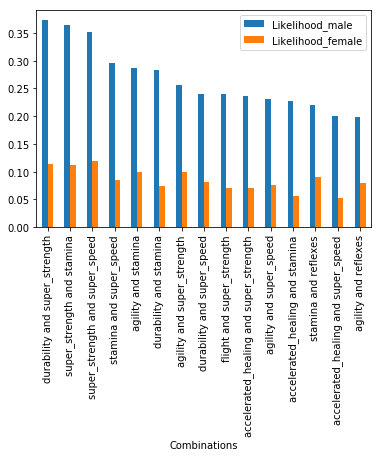

In [56]:
x.plot.bar(y=['Likelihood_male','Likelihood_female'])

#### What are the top 5 female power combinations?

In [57]:
#sort by male combination occurances (most likely to least likely)

y = cc_male_female_df.sort_values(by=['Occurances_female'], ascending=False).head(15)
y.head()

,Occurances_male,Likelihood_male,Occurances_female,Likelihood_female
Combinations,,,,
super_strength and super_speed,163,0.351293,55,0.118534
durability and super_strength,173,0.372845,53,0.114224
super_strength and stamina,169,0.364224,52,0.112069
agility and super_strength,119,0.256466,46,0.099138
agility and stamina,133,0.286638,46,0.099138


#### Comapare top 15 female power combinations to the number of occurances of that same combination in male heroes.

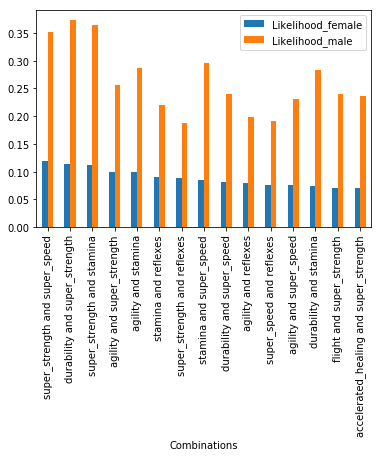

In [58]:
y.plot.bar(y=['Likelihood_female','Likelihood_male'])

## Findings:
#### Super strenghth and stamina are extremly popular amongst both male and female super heros - for the most part the top power combinations are similar fdespite gender.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data